<a href="https://learn.xnextcon.com/"><img src="aicamp.jpg"></img></a>
<strong><em><center><span style="color:darkred">This project was developed as part of the course: Full Stack Machine Learning in AWS at: </span></em></strong><p><center><a href="https://learn.xnextcon.com/">AICamp</a>

### Table of Contents

* [1. Project](#project)
* [2. Libraries](#library)
* [3. Data Collection](#collection)
* [4. Data Preparation](#preparation)
    * [1.0 Miscellaneous](#miscellaneous)
    * [1.1 Remove Columns/Rows](#removing)
    * [1.2 Missing Values](#missing)
    * [1.3 Transforming Columns](#transforming) 
    * [1.4 Imputation](#imputation)
        * [1.4.1 Deletion](#section_1_2_1)
        * [1.4.2 Imputation](#section_1_2_2)
* [5. Exploratory Data Analysis](#exploration)
    * [5.1 Univariate Analysis](#univariate)
    * [5.2 Bi-Variate Analysis](#bivariate)
    * [5.3 Multivariate Analysis](#multivariate)    
* [6. Feature Engineering](#engineering)
    * [6.1 General Transformation](#general_trans)
    * [6.2 Encoding](#encoding)
    * [6.3 Remove Columns](#remove_columns)  
* [7. Using Amazon SageMaker](#sagemaker)
    * [7.1 Formatting dataset](#formatting_aws)
    * [7.2 Modeling and Training on AWS](#modeling_aws)

<div class="alert alert-block alert-info">
<b><h1>1. Project</h1></div>
<a class="anchor" id="project"></a>

# Airline Passenger Satisfaction

Using a dataset that contains an airline passenger satisfaction survey, the goal of this project is to determine what factors lead to customer satisfaction for an Airline.
To do that, we will use XGboost and KNN algorithms on Amazon Sagemaker ML.
<img src="airline.jpg" width="100%" height="100%"/>

### <strong>Problem Statement</strong> 

Customer satisfaction metric is a vital element for businesses. Airlines companies need to measure this level of satisfaction in order to control and improve it, thus airlines can achieve a higher quality level that meets customer expectations. One technique that is utilized for this purpose, is the use of surveys. 

For this problem, we have a dataset that contains the following type of features:

<li><strong>Survey:</strong> Several features measured by 5-point Likert scale such as: Food and drink, Seat comfort, Inflight entertainment.
<li><strong>Demographic:</strong> features such as Age and Gender.
<li><strong>Commercial:</strong> features such as Customer Type.
<li><strong>Service:</strong> features related to the service provided that generated the survey such as: Type of Travel, Departure Delay in Minutes.

<strong>Pros:</strong>
The dataset is very clean, practically there is no missing values and there is also a minimun number of unuseful columns to be removed. Features descriptions are great, and the volume of data is appropriate. We will use ordinal and one-hot encoding to tranform the data.

<strong>Cons:</strong>
Features as a result of the survey have some observations populated with 0, which means no responses, thus in this case,  techniques to clean survey datasets may be helpful. Check this reference <a href="https://www.surveymonkey.com/curiosity/survey-data-cleaning-7-things-to-check-before-you-start-your-analysis/">Survey Cleaning Techniques</a>

<strong>Improvement Opportunities</strong>

<li>Adding a survey date, thus it would be possible to measure the level of satisfaction over the time
<li>Features values as a result of the survey are ranging from 1 to 5 (0 for no responses). These features have been considered as numeric, however, likert scale can be used as ordinal variable which is a categorical variable, thus we can train the model saying this explicitly.
    
    

<div class="alert alert-block alert-info">
<b><h1>2. Libraries</h1></div>
<a class="anchor" id="library"></a>

<strong>Import the usual libraries for pandas and plotting</strong>

In [490]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from IPython.display import Markdown, display
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import json

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
<b><h1>3. Data Collection</h1></div>
</a><a class="anchor" id="collection"></a>

<strong>Use pandas to read train.csv as a dataframe called impressions.</strong>

In [372]:
train_original = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')

<strong>Check out the info(), head(), and describe() methods on impressions.<strong>

In [373]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [374]:
test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [375]:
train_original.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [376]:
test_original.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [377]:
train_original.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [378]:
test_original.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


<div class="alert alert-block alert-info">
<b><h1>4. Data Preparation</h1></div>
</a><a class="anchor" id="preparation"></a>

<strong>Let's assign original dataframes to new ones.</strong>

In [379]:
train = train_original
test = test_original

<div class="alert alert-block alert-warning">
<b>4.0 Miscellaneous</b>
</div> </a><a class="anchor" id="miscellaneous"></a>

<strong>Renaming column labels when they contain blank spaces or any special character, to make them more manageable </strong>

In [380]:
def rename_column_labels(df, old_str = " ", new_str = "_"):
    #Use case: from "column number 1" to "column_number_1"
    display(Markdown('**Results:**' ))
    cols = df.loc[:,df.columns.str.contains(old_str)].shape[1]
    if cols > 0:
        print("Features changed => {0}".format(cols))
        display(df.loc[:,df.columns.str.contains(old_str)].columns.values)
        df.columns = [label.replace(old_str, new_str ) for label in df.columns]
    else:
        print("No changes were applied")
    return df

In [381]:
train = rename_column_labels(train," ","_")
train = rename_column_labels(train,"-","_")
train = rename_column_labels(train,":","_")

**Results:**

Features changed => 19


array(['Unnamed: 0', 'Customer Type', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype=object)

**Results:**

Features changed => 1


array(['On-board_service'], dtype=object)

**Results:**

Features changed => 1


array(['Unnamed:_0'], dtype=object)

In [382]:
test = rename_column_labels(test," ","_")
test = rename_column_labels(test,"-","_")
test = rename_column_labels(test,":","_")

**Results:**

Features changed => 19


array(['Unnamed: 0', 'Customer Type', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype=object)

**Results:**

Features changed => 1


array(['On-board_service'], dtype=object)

**Results:**

Features changed => 1


array(['Unnamed:_0'], dtype=object)

<div class="alert alert-block alert-warning">
<b>4.1 Remove Columns/Rows</b>
</div> </a><a class="anchor" id="removing"></a>

<strong>Let's do a quick review of list of values per each column.</strong>

In [383]:
def list_column_values(df, number_of_values, print_all):
    display(Markdown('**Results:**' ))
    for col in df.columns[0:]:
        if df[col].nunique() <= number_of_values:
            print(f"{col.ljust(25)}" +  ' ==> ' + str(df[col].sort_values().unique().tolist()) )
        else:  
            if print_all=='True':
               print(f"{col.ljust(25)}" + ' ==> more than ' + str(number_of_values) + ' values')

In [384]:
list_column_values(train,3,'False')

**Results:**

Gender                    ==> ['Female', 'Male']
Customer_Type             ==> ['Loyal Customer', 'disloyal Customer']
Type_of_Travel            ==> ['Business travel', 'Personal Travel']
Class                     ==> ['Business', 'Eco', 'Eco Plus']
satisfaction              ==> ['neutral or dissatisfied', 'satisfied']


In [385]:
def list_column_values_percentage(df, number_of_values):
    display(Markdown('**Results:**' ))
    print('Columns with less than ' + str(number_of_values) + ' values')
    for col in df.columns[0:]:
        if train[col].nunique() <= number_of_values:
            print(df[col].value_counts()/len(train)) 

In [386]:
list_column_values_percentage(train, 3)

**Results:**

Columns with less than 3 values
Female    0.507459
Male      0.492541
Name: Gender, dtype: float64
Loyal Customer       0.817322
disloyal Customer    0.182678
Name: Customer_Type, dtype: float64
Business travel    0.689627
Personal Travel    0.310373
Name: Type_of_Travel, dtype: float64
Business    0.477989
Eco         0.449886
Eco Plus    0.072124
Name: Class, dtype: float64
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64


<strong>Let's remove unuseful columns such as ID's.</strong>

In [387]:
train.head()

,Unnamed__0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [388]:
def remove_column_values(df, columns_to_remove):
    display(Markdown('**Results:**'))
    print("Original number of features => {}".format(df.shape[1]))
    i=0
    for col in columns_to_remove:
        if col in df.columns:
            i+=1
            df = df.drop(col, axis=1)
            print("Column: {} was removed".format(col))
        else:
            print("Column: {} does not exist".format(col))
    if i==0:
        print('No features were removed')
    else:    
        print("Number of features has been reduced to => {}".format(df.shape[1]))
    return df

In [389]:
train = remove_column_values(train,['Unnamed__0','id'])

**Results:**

Original number of features => 25
Column: Unnamed__0 was removed
Column: id was removed
Number of features has been reduced to => 23


In [390]:
test = remove_column_values(test,['Unnamed__0','id'])

**Results:**

Original number of features => 25
Column: Unnamed__0 was removed
Column: id was removed
Number of features has been reduced to => 23


<div class="alert alert-block alert-warning">
<b>4.2 Missing Values</b>
</div> </a><a class="anchor" id="missing"></a>

<strong>Let's use firstly a standard function, then a customized one, and finally a visual representation.</strong>

In [391]:
train.isnull().sum()

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On_board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                           0
dtype: int64

In [392]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        display(Markdown('**Results:**'))
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There is/are " + str(mis_val_table_ren_columns.shape[0]) +
              " column(s) that have missing values.")

        return mis_val_table_ren_columns

In [393]:
missing_values_table(train)

**Results:**

Your selected dataframe has 23 columns.
There is/are 1 column(s) that have missing values.


,Missing Values,% of Total Values
Arrival_Delay_in_Minutes,310,0.3


In [394]:
missing_values_table(test)

**Results:**

Your selected dataframe has 23 columns.
There is/are 1 column(s) that have missing values.


,Missing Values,% of Total Values
Arrival_Delay_in_Minutes,83,0.3


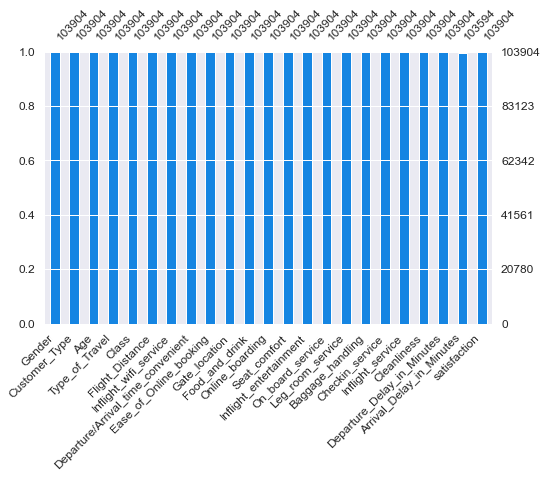

In [395]:
msno.bar(train, color = '#1585E2',fontsize=12,figsize = (8, 5))

<strong>Let's remove selected columns/rows with too many missing values if applies.</strong>

In [396]:
train = remove_column_values(train, ['x'])

**Results:**

Original number of features => 23
Column: x does not exist
No features were removed


In [397]:
test = remove_column_values(test, ['x'])

**Results:**

Original number of features => 23
Column: x does not exist
No features were removed


<div class="alert alert-block alert-warning">
<b>4.3 Imputation</b>
</div> </a><a class="anchor" id="imputation"></a>

<strong>Let's use mean technique to impute missing values for column(s) identified in previous step.</strong>

In [398]:
mean_imputer = SimpleImputer(strategy='mean')
train["Arrival_Delay_in_Minutes"] = mean_imputer.fit_transform(train[["Arrival_Delay_in_Minutes"]])

<strong>Now, let's check the missingness of the dataset.</strong>

In [399]:
missing_values_table(train)

**Results:**

Your selected dataframe has 23 columns.
There is/are 0 column(s) that have missing values.


,Missing Values,% of Total Values


In [400]:
test["Arrival_Delay_in_Minutes"] = mean_imputer.fit_transform(test[["Arrival_Delay_in_Minutes"]])

In [401]:
missing_values_table(test)

**Results:**

Your selected dataframe has 23 columns.
There is/are 0 column(s) that have missing values.


,Missing Values,% of Total Values


<div class="alert alert-block alert-warning">
<b>4.4 Transforming Columns</b>
</div> </a><a class="anchor" id="transforming"></a>

<strong>Let's review if there are object columns.</strong>

In [402]:
print("Column data types and their frequency\n{}".format(train.dtypes.value_counts()))

Column data types and their frequency
int64      17
object      5
float64     1
dtype: int64


<strong>Let's see if some of these columns are numeric.</strong>

In [403]:
def check_object_columns(df):
    display(Markdown('**Results:**'))
    object_columns_df = df.select_dtypes(include=['object'])
    print(object_columns_df.iloc[0])
    i=0
    for col in object_columns_df:
        if is_numeric_dtype(df[col]):
            i+=1
            print(f"{col.ljust(25)}" + ' ==> is Numeric')
    if i==0:
        print('No numeric columns were found')
    else:    
        print("Number of numeric columns found => {}".format(i))

In [404]:
check_object_columns(train)

**Results:**

Gender                               Male
Customer_Type              Loyal Customer
Type_of_Travel            Personal Travel
Class                            Eco Plus
satisfaction      neutral or dissatisfied
Name: 0, dtype: object
No numeric columns were found


<strong>Let's convert columns tonumeric if any.</strong>

In [405]:
def columns_to_numeric(df,columns_to_convert = []):
    display(Markdown('**Results:**'))
    i=0
    for col in columns_to_convert:
        if col in df.columns:
            if is_numeric_dtype(df[col]):
                i+=1
                df[col] = df[col].str.rstrip('%').astype('float')
                print("Column {} was converted".format(col))
            else:
                print("Column {} could not be converted".format(col))
        else:
            print("Column {} does not exist".format(col))
    if i==0:
        print('No columns were converted')          
    return df

In [406]:
train = columns_to_numeric(train,['x','y'])

**Results:**

Column x does not exist
Column y does not exist
No columns were converted


<strong>Let's convert object columns to strings.</strong>

In [407]:
def object_to_str(df, to_str_cols):
    display(Markdown('**Results:**'))
    i=0    
    for col in to_str_cols:
        if col in df.columns:
            i+=1
            df[col] = df[col].astype(str)
            print("Column {} was converted".format(col))
        else:
            print("Column {} does not exist".format(col))    
    if i==0:
        print('No columns were converted')          
    return df

In [408]:
to_str_cols = ['Gender','Customer_Type','Type_of_Travel','Class','satisfaction']
train = object_to_str(train, to_str_cols)

**Results:**

Column Gender was converted
Column Customer_Type was converted
Column Type_of_Travel was converted
Column Class was converted
Column satisfaction was converted


In [409]:
test = object_to_str(test, to_str_cols)

**Results:**

Column Gender was converted
Column Customer_Type was converted
Column Type_of_Travel was converted
Column Class was converted
Column satisfaction was converted


<div class="alert alert-block alert-info">
<b><h1>5. Exploratory Data Analysis</h1></div>
</a><a class="anchor" id="exploration"></a>

<strong>Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities.</strong>

<code style="background:yellow;color:black">Target column is assigned to <strong>l_target</strong> variable to make the visualization code more dynamic.</code>

In [410]:
l_target = 'satisfaction'

<div class="alert alert-block alert-warning">
<b>5.1 Univariate Analysis</b>
</div> </a><a class="anchor" id="univariate"></a>

<strong>Let's quick review target column values/distribution.</strong>

In [411]:
list_column_values_percentage(train,15)

**Results:**

Columns with less than 15 values
Female    0.507459
Male      0.492541
Name: Gender, dtype: float64
Loyal Customer       0.817322
disloyal Customer    0.182678
Name: Customer_Type, dtype: float64
Business travel    0.689627
Personal Travel    0.310373
Name: Type_of_Travel, dtype: float64
Business    0.477989
Eco         0.449886
Eco Plus    0.072124
Name: Class, dtype: float64
3    0.248961
2    0.248595
4    0.190503
1    0.171697
5    0.110381
0    0.029864
Name: Inflight_wifi_service, dtype: float64
4    0.245862
5    0.215612
3    0.172910
2    0.165451
1    0.149157
0    0.051009
Name: Departure/Arrival_time_convenient, dtype: float64
3    0.235304
2    0.231185
4    0.188357
1    0.168665
5    0.133306
0    0.043184
Name: Ease_of_Online_booking, dtype: float64
3    0.275033
4    0.235082
2    0.187279
1    0.169021
5    0.133575
0    0.000010
Name: Gate_location, dtype: float64
4    0.234438
5    0.214746
3    0.214621
2    0.211618
1    0.123547
0    0.001030
Name: Food_and_drin

In [412]:
def plot_target_column (df, target):
    ax = sns.countplot(x=target, data=df)
    plt.title('Distribution of ' + target + ' column')
    plt.xlabel('Frequency')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
    total = len(df[target])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
            ax.text(p.get_x()+p.get_width()/2., p.get_height() + 0.2, p.get_height(),ha="center")
    plt.show()

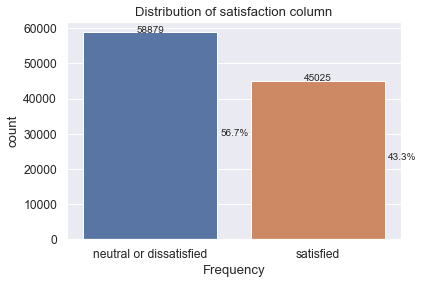

In [413]:
plot_target_column(train, l_target)

<strong>Let's do again a quick review of list of values per each column.</strong>

In [414]:
list_column_values(train,15,'True')

**Results:**

Gender                    ==> ['Female', 'Male']
Customer_Type             ==> ['Loyal Customer', 'disloyal Customer']
Age                       ==> more than 15 values
Type_of_Travel            ==> ['Business travel', 'Personal Travel']
Class                     ==> ['Business', 'Eco', 'Eco Plus']
Flight_Distance           ==> more than 15 values
Inflight_wifi_service     ==> [0, 1, 2, 3, 4, 5]
Departure/Arrival_time_convenient ==> [0, 1, 2, 3, 4, 5]
Ease_of_Online_booking    ==> [0, 1, 2, 3, 4, 5]
Gate_location             ==> [0, 1, 2, 3, 4, 5]
Food_and_drink            ==> [0, 1, 2, 3, 4, 5]
Online_boarding           ==> [0, 1, 2, 3, 4, 5]
Seat_comfort              ==> [0, 1, 2, 3, 4, 5]
Inflight_entertainment    ==> [0, 1, 2, 3, 4, 5]
On_board_service          ==> [0, 1, 2, 3, 4, 5]
Leg_room_service          ==> [0, 1, 2, 3, 4, 5]
Baggage_handling          ==> [1, 2, 3, 4, 5]
Checkin_service           ==> [0, 1, 2, 3, 4, 5]
Inflight_service          ==> [0, 1, 2, 3, 4, 5]
Cleanlin

<strong>Let's plot categorical columns.</strong>

In [415]:
def plot_categorical_columns(df):
    categorical = train.select_dtypes(exclude=['int', 'float','int32','float32','int64','float64']).columns
    lcols_in_plot = 2
    lrows_in_plot = math.ceil(len(categorical)/lcols_in_plot)   
    fig, ax = plt.subplots( lrows_in_plot, lcols_in_plot , figsize=(20, 30))
    plt.subplots_adjust(wspace=0.2, hspace=0.4) 
    sns.set(font_scale = 1.1)
    for variable, subplot in zip(categorical, ax.flatten()):
        sns.countplot(train[variable], ax=subplot)
        for label in subplot.get_xticklabels():
            label.set_rotation(45)
            label.set_ha("right")
            label.set_rotation_mode("anchor")

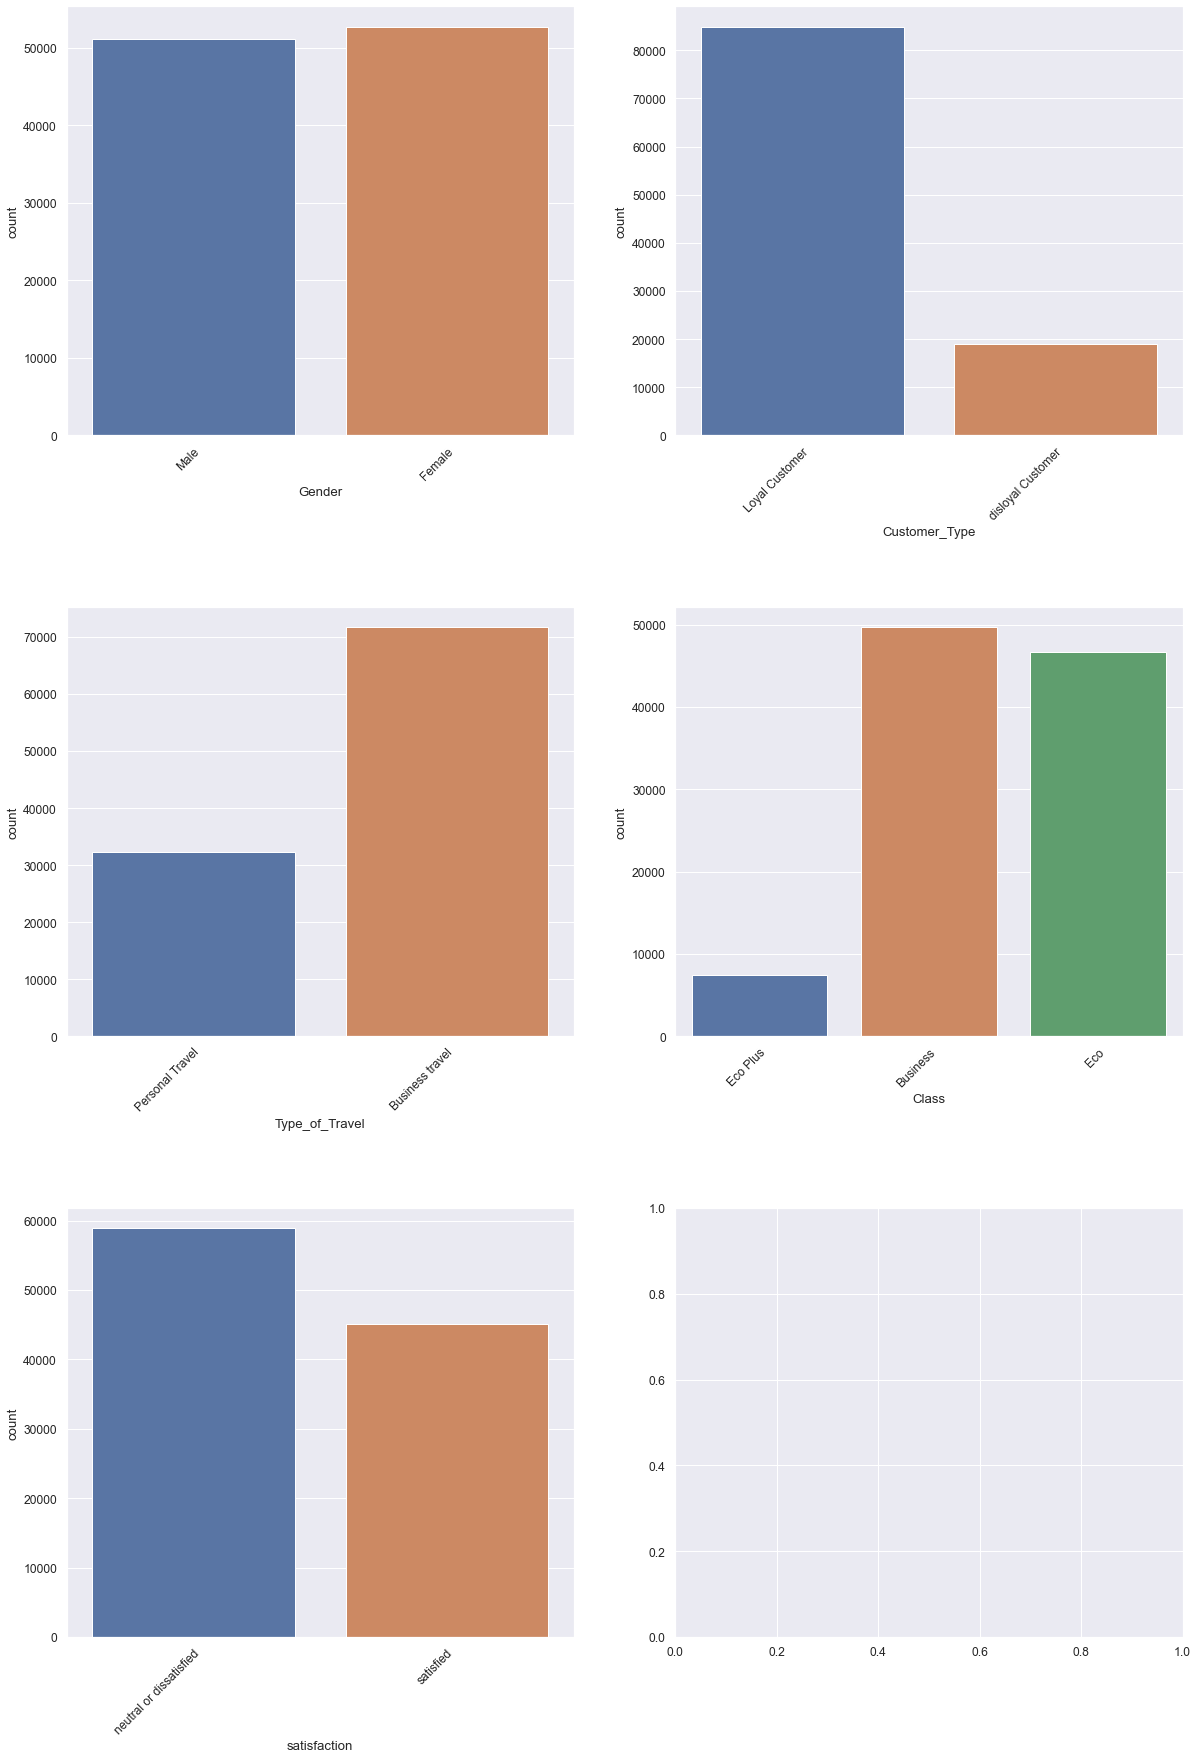

In [416]:
plot_categorical_columns(train)

<strong>Let's plot numerical columns.</strong>
Using standard and customized function.

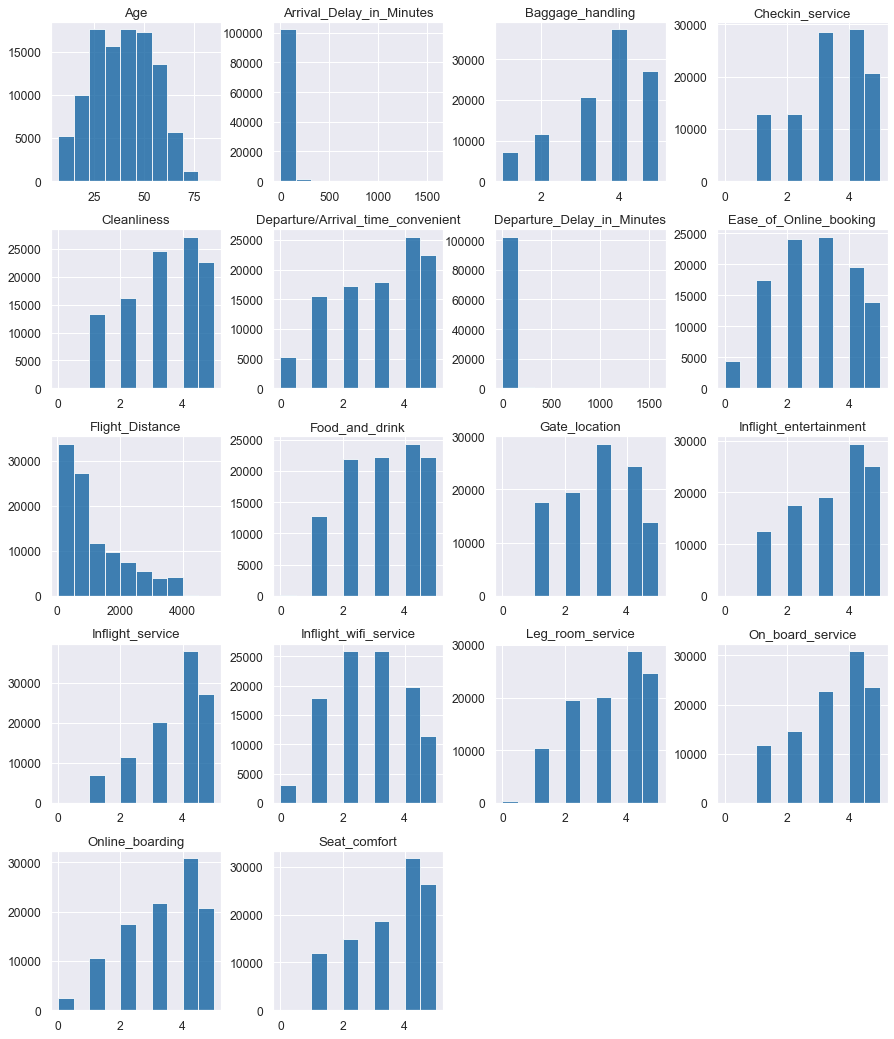

In [417]:
hist = train.hist(figsize = (15, 22), layout=(6, 4) , color='#1363a1',alpha=0.8 )

In [418]:
def plot_numerical_columns(df):
    df = df[df.select_dtypes([np.int64,np.float64]).columns]
    lcols = 2
    lrows = math.ceil(len(df.columns)/lcols)
    plt.figure(figsize=(20,20))
    plt.subplots_adjust(wspace=0.2, hspace=0.5) 
    for i, column in enumerate(df.columns):
        plt.subplot(lrows,lcols,i+1)
        sns.distplot(df[column])

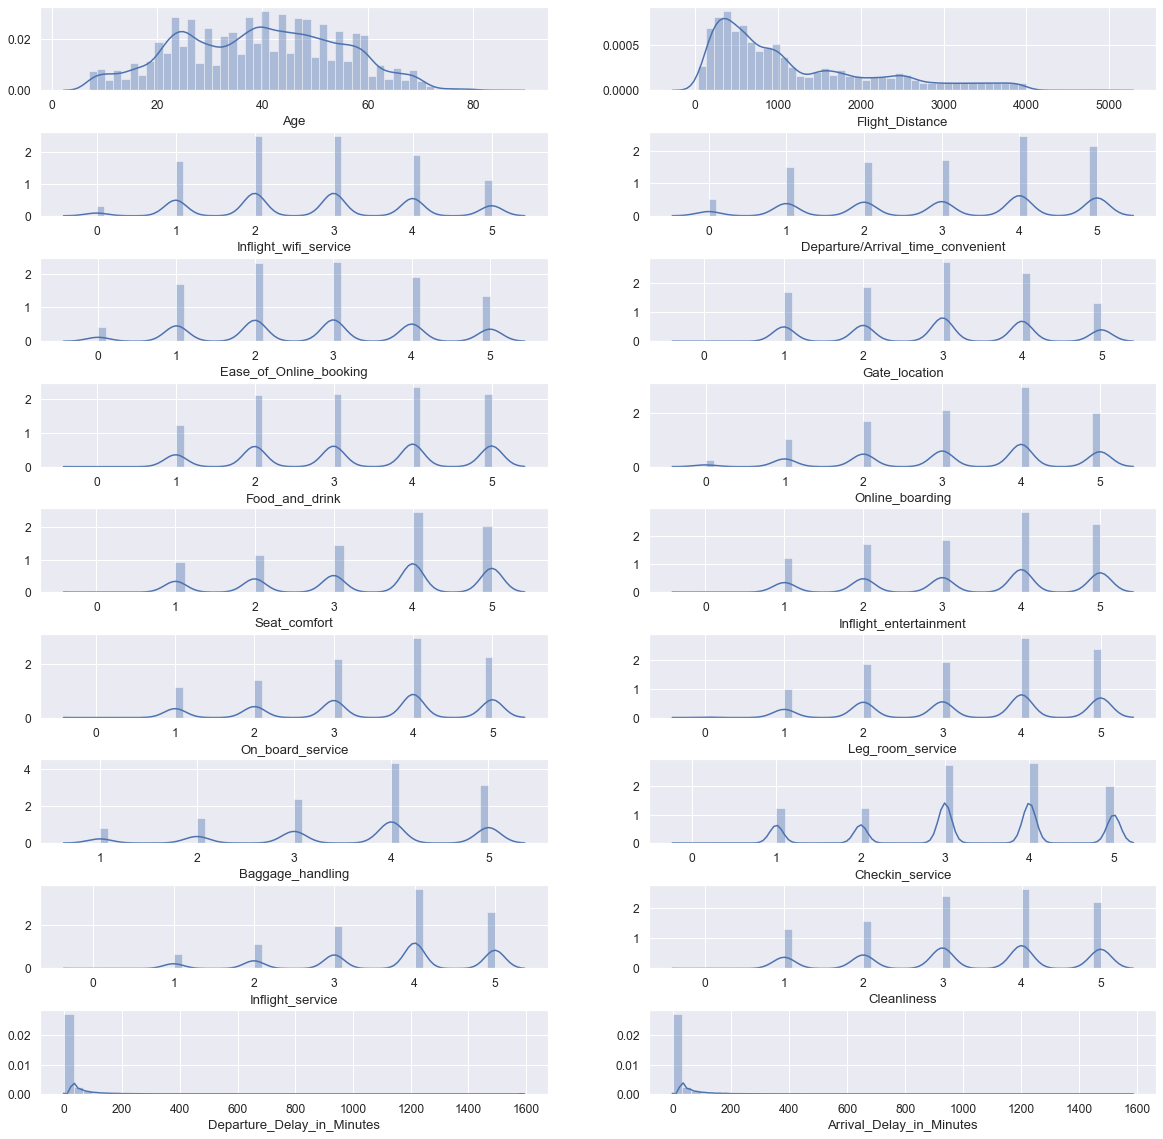

In [419]:
plot_numerical_columns(train)

<div class="alert alert-block alert-warning">
<b>5.2 Bi-variate Analysis</b>
</div> </a><a class="anchor" id="bivariate"></a>

<strong>Let's use crosstab function.</strong> For more info <a href="https://www.earthdatascience.org/courses/earth-analytics-bootcamp/git-github-version-control/markdown-jupyter-notebook/" target="_blank">Use this link</a>. 


In [420]:
col = train.Inflight_entertainment
pd.crosstab(train[l_target], [col], margins=True, margins_name="Total", normalize='index')

Inflight_entertainment,0,1,2,3,4,5
satisfaction,,,,,,
neutral or dissatisfied,0.000238,0.182289,0.235653,0.237266,0.194008,0.150546
satisfied,0.000000,0.038756,0.083554,0.114803,0.399778,0.363109
Total,0.000135,0.120092,0.169743,0.184199,0.283175,0.242657


In order to calculate the **correlation matrix** for pairs of categorical features, we need first to encode the textual values into numeric ones to be able to plot 

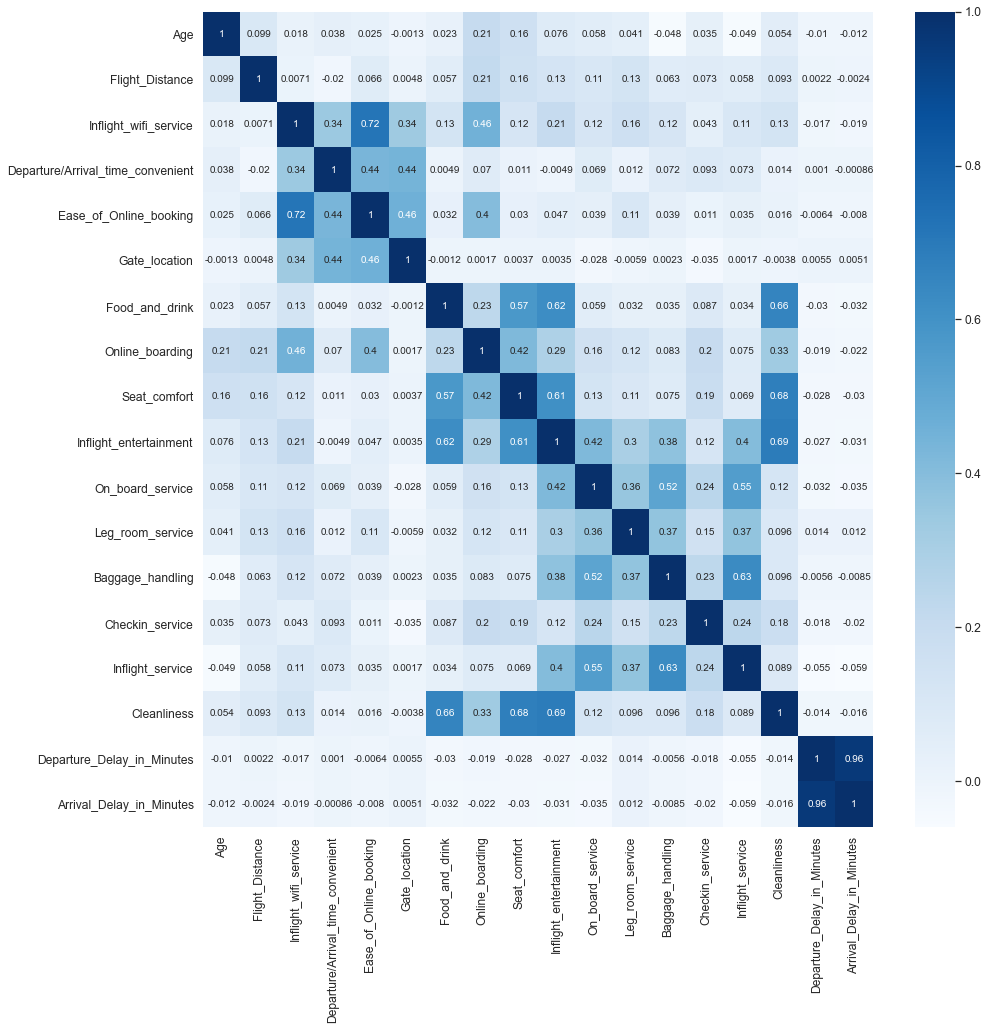

In [421]:
plt.subplots(figsize=(15,15))
data = train.corr()
sns.heatmap(data, cmap ='Blues', annot=True, annot_kws={"size": 10})

A **stacked** column plot can be useful in visualizing the relationship between two categorical variables. We can compare the percentages that each category from one variable contributes to a total across categories of the second variable.

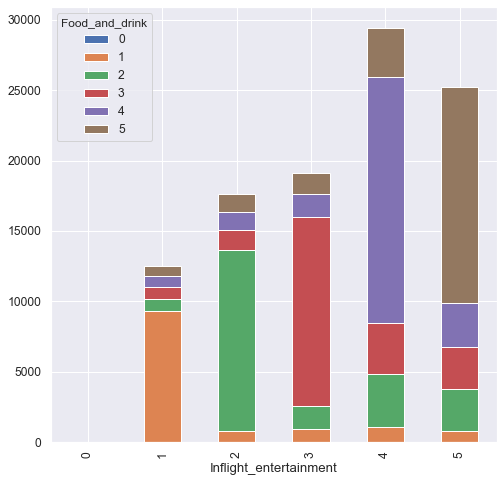

In [422]:
Inflight_entertainment_vs_Food_and_drink = pd.crosstab(index=train["Inflight_entertainment"], columns=train["Food_and_drink"]) 
Inflight_entertainment_vs_Food_and_drink.plot(kind="bar", figsize=(8,8),stacked=True)

<div class="alert alert-block alert-warning">
<b>5.3 Multivariate Analysis</b>
</div> </a><a class="anchor" id="multivariate"></a>

<strong>Let's compare groups/subgroups in our data. Using colors (hue) to represent different groups</strong>

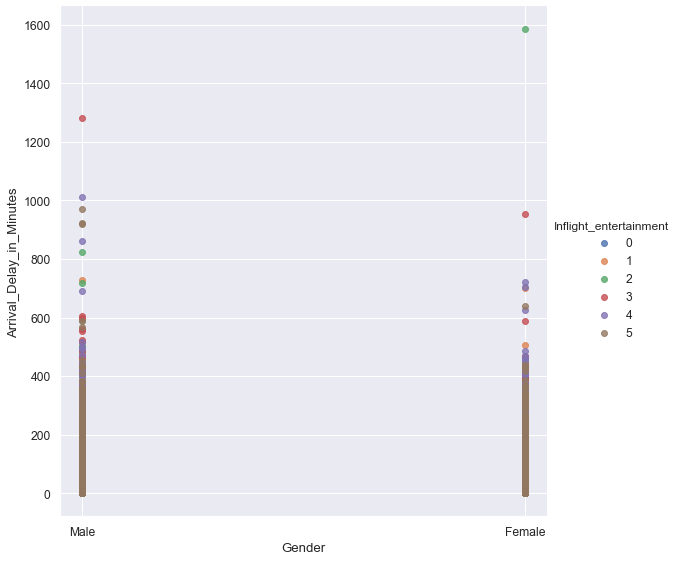

In [423]:
sns.lmplot(x='Gender', y='Arrival_Delay_in_Minutes', hue='Inflight_entertainment', data=train, fit_reg=False, size=8)

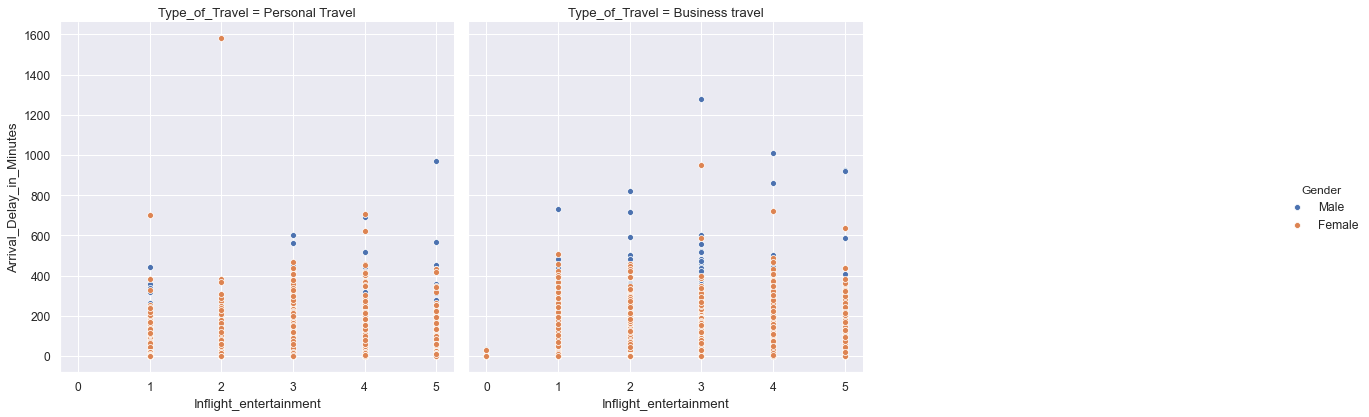

In [424]:
cond_plot = sns.FacetGrid(data=train, col='Type_of_Travel', hue='Gender', col_wrap=3 , size=6,aspect=1)
cond_plot.map(sns.scatterplot, 'Inflight_entertainment', 'Arrival_Delay_in_Minutes').add_legend()

<div class="alert alert-block alert-info">
<b><h1>6. Feature Engineering</h1></div>
</a><a class="anchor" id="engineering"></a>

<strong>Let's move tables to new ones.</strong>

In [425]:
train_fe = train
test_fe = test

In [426]:
print("Column data types and their frequency\n{}".format(train_fe.dtypes.value_counts()))

Column data types and their frequency
int64      17
object      5
float64     1
dtype: int64


In [427]:
list_column_values(train_fe,15,'True')

**Results:**

Gender                    ==> ['Female', 'Male']
Customer_Type             ==> ['Loyal Customer', 'disloyal Customer']
Age                       ==> more than 15 values
Type_of_Travel            ==> ['Business travel', 'Personal Travel']
Class                     ==> ['Business', 'Eco', 'Eco Plus']
Flight_Distance           ==> more than 15 values
Inflight_wifi_service     ==> [0, 1, 2, 3, 4, 5]
Departure/Arrival_time_convenient ==> [0, 1, 2, 3, 4, 5]
Ease_of_Online_booking    ==> [0, 1, 2, 3, 4, 5]
Gate_location             ==> [0, 1, 2, 3, 4, 5]
Food_and_drink            ==> [0, 1, 2, 3, 4, 5]
Online_boarding           ==> [0, 1, 2, 3, 4, 5]
Seat_comfort              ==> [0, 1, 2, 3, 4, 5]
Inflight_entertainment    ==> [0, 1, 2, 3, 4, 5]
On_board_service          ==> [0, 1, 2, 3, 4, 5]
Leg_room_service          ==> [0, 1, 2, 3, 4, 5]
Baggage_handling          ==> [1, 2, 3, 4, 5]
Checkin_service           ==> [0, 1, 2, 3, 4, 5]
Inflight_service          ==> [0, 1, 2, 3, 4, 5]
Cleanlin

<strong>Let's review specific columns distribution.</strong>

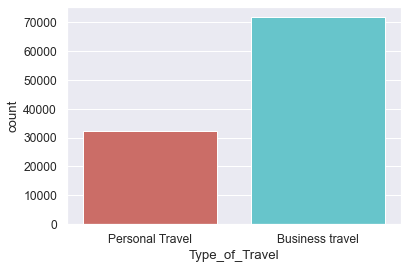

In [428]:
sns.countplot(x='Type_of_Travel',data=train_fe, palette='hls')
plt.show();

<div class="alert alert-block alert-warning">
<b>6.1 General Transformation</b>
</div> </a><a class="anchor" id="general_trans"></a>

<strong>Let's replace categorical values with numerical values.</strong>

In [429]:
train_fe['satisfaction'].replace(['neutral or dissatisfied','satisfied'],[0,1],inplace=True)

In [430]:
test_fe['satisfaction'].replace(['neutral or dissatisfied','satisfied'],[0,1],inplace=True)

In [431]:
print("Column data types and their frequency\n{}".format(train_fe.dtypes.value_counts()))

Column data types and their frequency
int64      18
object      4
float64     1
dtype: int64


<div class="alert alert-block alert-warning">
<b>6.2 Encoding</b>
</div> </a><a class="anchor" id="encoding"></a>

In [433]:
train_fe.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


Basically the <strong>fit </strong>method, prepare the encoder (fit on your data i.e. prepare the mapping) but don't transform the data.
You have to call <strong>transform</strong> to transform the data , or use <strong>fit_transform</strong> which fit and transform the same data.

In [434]:
print("Column data types and their frequency\n{}".format(train_fe.dtypes.value_counts()))

Column data types and their frequency
int64      18
object      4
float64     1
dtype: int64


### LABEL ENCODER

In [435]:
def labelencoder(df, encode_cols ):
    '''
    Label Encoder function
    '''
    print('Processing label encoder features..\nOld df shape:{}'.format(df.shape))
    enc = LabelEncoder()
    for col in encode_cols:
        enc.fit(df[col])
        df[col] = enc.transform(df[col])
    display(Markdown('**Results:**'))
    print('New df shape:{}'.format(df.shape))
    return df

<strong>This dataset does not have any candidate to use label encoder </strong>

In [436]:
encode_cols = []
train_fe = labelencoder(train_fe,encode_cols)

Processing label encoder features..
Old df shape:(103904, 23)


**Results:**

New df shape:(103904, 23)


In [437]:
test_fe = labelencoder(test_fe,encode_cols)

Processing label encoder features..
Old df shape:(25976, 23)


**Results:**

New df shape:(25976, 23)


In [438]:
train_fe.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


### ORDINAL ENCODER

<strong>Let's apply ordinal encoder using pandas factorize method for ordinal data </strong><br>
In this case, we found that the feature called "CLASS" requires encoding, and since it represents ordinal values, where 'Business' > 'Eco Plus' > 'Eco', we will use <strong>Ordinal Encoding Technique</strong>.

In [439]:
train_fe['Class'].unique().tolist()

['Eco Plus', 'Business', 'Eco']

In [440]:
def ordinalencoder(df_col, categories ):
    '''
    Ordinal Encoder function
    '''
    # Using pandas factorize method for ordinal data
    l_categories = pd.Categorical(df_col, categories=['Business','Eco Plus','Eco'], ordered=True)
    l_col = df_col.name
    # Factorizing the column data
    labels, unique = pd.factorize(l_categories, sort=True)
    df_col = labels
    display(Markdown('**Results:**'))
    print('Conversion applied to column: {}'.format(l_col))
    return df_col

In [441]:
train_fe['Class'].unique().tolist()

['Eco Plus', 'Business', 'Eco']

In [442]:
categories=['Business','Eco Plus','Eco']

train_fe['Class'] = ordinalencoder(train_fe['Class'], categories)

**Results:**

Conversion applied to column: Class


In [443]:
train_fe['Class'].unique().tolist()

[1, 0, 2]

<strong>Now, let's apply it to test </strong>

In [444]:
test_fe['Class'].unique().tolist()

['Eco', 'Business', 'Eco Plus']

In [445]:
test_fe['Class'] = ordinalencoder(test_fe['Class'], categories)

**Results:**

Conversion applied to column: Class


In [446]:
test_fe['Class'].unique().tolist()

[2, 0, 1]

In [447]:
train_fe.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


### ONE HOT ENCONDER

There are several columns which require <strong>One Hot Encoding</strong> since they have values which are not in order necessarily and also the number of values are not too many.

In [448]:
def one_hot_encoder(df, cat_cols ):
    '''
    One-Hot Encoder function
    '''
    print('Creating OHE features..\nOld df shape:{}'.format(df.shape))
    df = pd.get_dummies(df, columns=cat_cols)
    print('New df shape:{}'.format(df.shape))
    return df

In [449]:
cat_cols = ['Gender','Customer_Type','Type_of_Travel']
train_fe = one_hot_encoder(train_fe,cat_cols)
test_fe = one_hot_encoder(test_fe,cat_cols)

Creating OHE features..
Old df shape:(103904, 23)
New df shape:(103904, 26)
Creating OHE features..
Old df shape:(25976, 23)
New df shape:(25976, 26)


In [450]:
train_fe.head()

,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel
0,13,1,460,3,4,3,1,5,3,5,...,5,25,18.0,0,0,1,1,0,0,1
1,25,0,235,3,2,3,3,1,3,1,...,1,1,6.0,0,0,1,0,1,1,0
2,26,0,1142,2,2,2,2,5,5,5,...,5,0,0.0,1,1,0,1,0,1,0
3,25,0,562,2,5,5,5,2,2,2,...,2,11,9.0,0,1,0,1,0,1,0
4,61,0,214,3,3,3,3,4,5,5,...,3,0,0.0,1,0,1,1,0,1,0


In [118]:
test_fe.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,1,1,0,1,0,1,0,0,1,0
1,36,2863,1,1,3,1,5,4,5,4,...,1,1,0,1,0,1,0,1,0,0
2,20,192,2,0,2,4,2,2,2,2,...,0,0,1,0,1,1,0,0,1,0
3,44,3377,0,0,0,2,3,4,4,1,...,1,0,1,1,0,1,0,1,0,0
4,49,1182,2,3,4,3,4,1,2,2,...,1,1,0,1,0,1,0,0,1,0


<div class="alert alert-block alert-warning">
<b>6.3 Remove Columns</b>
</div> </a><a class="anchor" id="remove_columns"></a>

<strong>Let's review if new correlated features cases appear</strong>

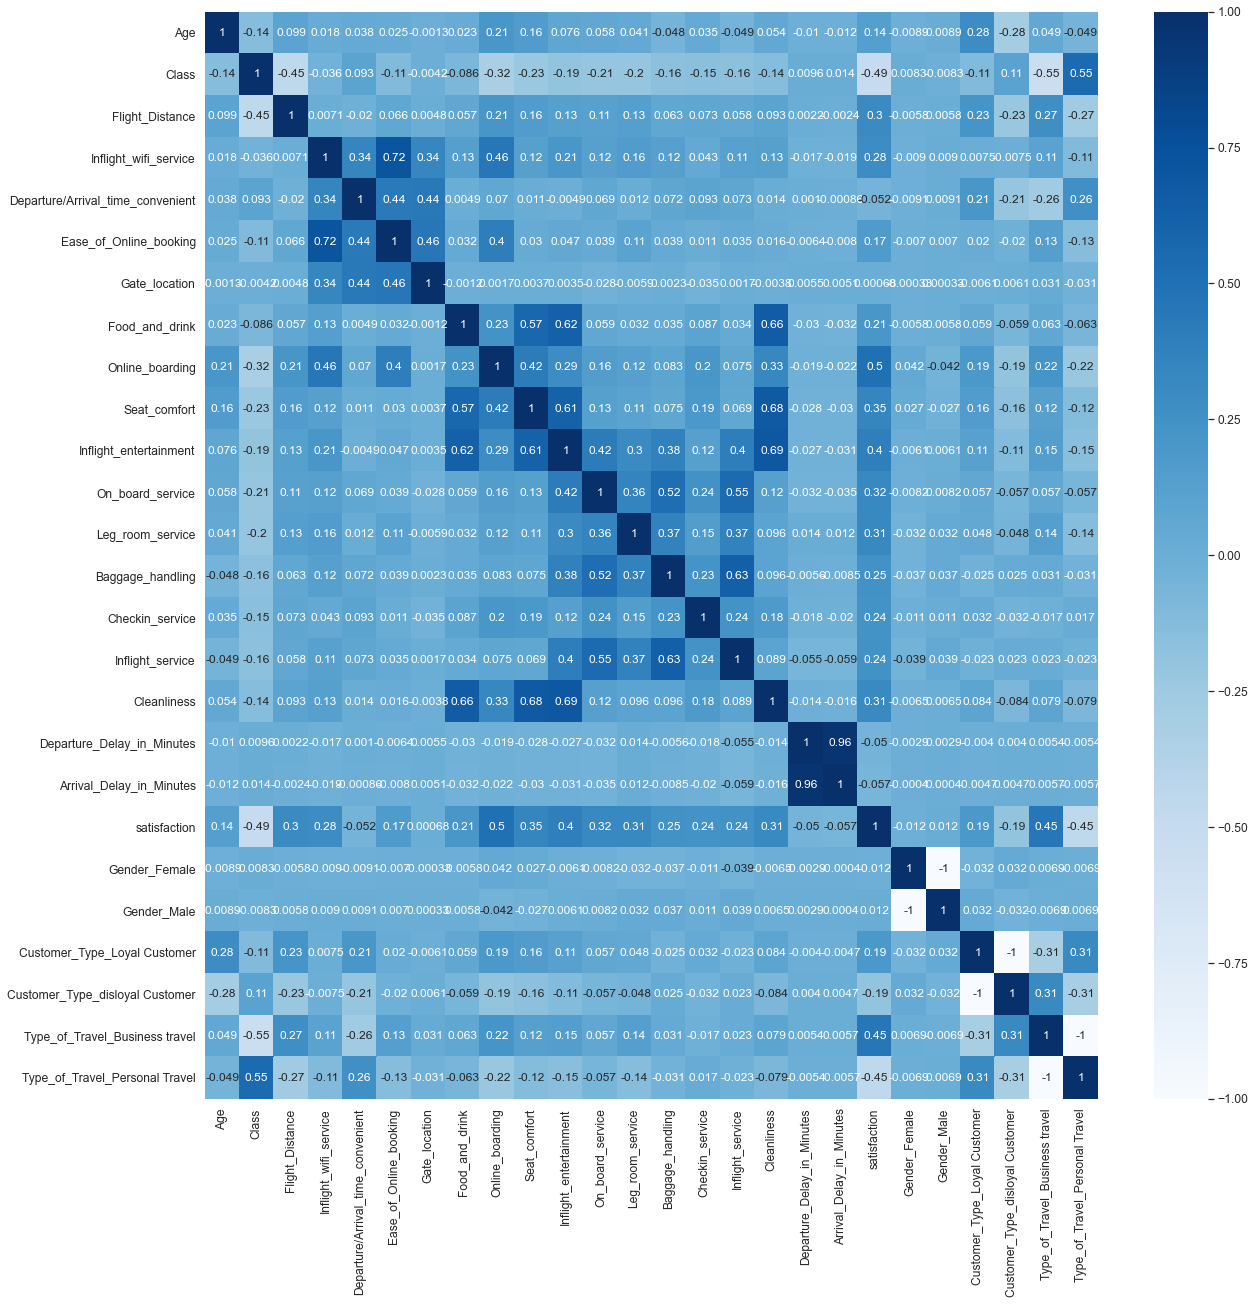

In [451]:
plt.subplots(figsize=(20,20))
data = train_fe.corr()
sns.heatmap(data, cmap ='Blues', annot=True, annot_kws={"size": 12})

<strong>Let's new columns identified as unuseful.</strong>

In [452]:
rm_col=[]

In [453]:
train_fe = remove_column_values(train_fe, rm_col)

**Results:**

Original number of features => 26
No features were removed


In [454]:
test_fe = remove_column_values(test_fe, rm_col)

**Results:**

Original number of features => 26
No features were removed


In [457]:
train_fe.head()

,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel
0,13,1,460,3,4,3,1,5,3,5,...,5,25,18.0,0,0,1,1,0,0,1
1,25,0,235,3,2,3,3,1,3,1,...,1,1,6.0,0,0,1,0,1,1,0
2,26,0,1142,2,2,2,2,5,5,5,...,5,0,0.0,1,1,0,1,0,1,0
3,25,0,562,2,5,5,5,2,2,2,...,2,11,9.0,0,1,0,1,0,1,0
4,61,0,214,3,3,3,3,4,5,5,...,3,0,0.0,1,0,1,1,0,1,0


In [458]:
test_fe.head()

,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel
0,52,2,160,5,4,3,4,3,4,3,...,5,50,44.0,1,1,0,1,0,1,0
1,36,0,2863,1,1,3,1,5,4,5,...,5,0,0.0,1,1,0,1,0,1,0
2,20,2,192,2,0,2,4,2,2,2,...,2,0,0.0,0,0,1,0,1,1,0
3,44,0,3377,0,0,0,2,3,4,4,...,4,0,6.0,1,0,1,1,0,1,0
4,49,2,1182,2,3,4,3,4,1,2,...,4,0,20.0,1,1,0,1,0,1,0


<div class="alert alert-block alert-info">
<b><h1>7. Using Amazon SageMaker</h1></div>
<a class="anchor" id="sagemaker"></a>

<div class="alert alert-block alert-warning">
<b>7.1 Formatting dataset</b>
</div> </a><a class="anchor" id="formatting_aws"></a>

<strong> Let's move target column to the first position and then remove headers </strong>

In [459]:
cols = train_fe.columns.tolist()
colIdx = train_fe.columns.get_loc(l_target)
cols = cols[colIdx:colIdx+1] + cols[0:colIdx] + cols[colIdx+1:]
train_aws = train_fe[cols]

In [460]:
train_aws.head()

,satisfaction,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,...,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel
0,0,13,1,460,3,4,3,1,5,3,...,5,5,25,18.0,0,1,1,0,0,1
1,0,25,0,235,3,2,3,3,1,3,...,4,1,1,6.0,0,1,0,1,1,0
2,1,26,0,1142,2,2,2,2,5,5,...,4,5,0,0.0,1,0,1,0,1,0
3,0,25,0,562,2,5,5,5,2,2,...,4,2,11,9.0,1,0,1,0,1,0
4,1,61,0,214,3,3,3,3,4,5,...,3,3,0,0.0,0,1,1,0,1,0


In [461]:
cols = test_fe.columns.tolist()
colIdx = test_fe.columns.get_loc(l_target)
cols = cols[colIdx:colIdx+1] + cols[0:colIdx] + cols[colIdx+1:]
test_aws = test_fe[cols]

In [462]:
test_aws.head()

,satisfaction,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,...,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel
0,1,52,2,160,5,4,3,4,3,4,...,5,5,50,44.0,1,0,1,0,1,0
1,1,36,0,2863,1,1,3,1,5,4,...,4,5,0,0.0,1,0,1,0,1,0
2,0,20,2,192,2,0,2,4,2,2,...,2,2,0,0.0,0,1,0,1,1,0
3,1,44,0,3377,0,0,0,2,3,4,...,1,4,0,6.0,0,1,1,0,1,0
4,1,49,2,1182,2,3,4,3,4,1,...,2,4,0,20.0,1,0,1,0,1,0


<strong> Let's remove headers and save datasets as files </strong>

In [463]:
train_aws.to_csv('train_aws.csv',  header = False, index = False)
test_aws.to_csv('test_aws.csv',  header = False, index = False)

<strong>2 pairs of datasets were loaded. One pair has 2 features more since the column CLASS was encoded using the one-hot technique</strong>

<img src="AWSDatasets.jpg"></img>

<div class="alert alert-block alert-warning">
<b>7.2 Modeling and Training on AWS </b>
</div> </a><a class="anchor" id="modeling_aws"></a>

## <strong> Before training the model on Amazon SageMaker, let's try to use LIGHTGBM </strong>

In [504]:
X = train_fe.drop([l_target], axis=1)
y = train_fe[l_target].reset_index(drop=True)

X_test = test_fe.drop([l_target], axis=1)

X.shape, y.shape, X_test.shape

((103904, 25), (103904,), (25976, 25))

In [505]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [506]:
x_val.head()

,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel
66241,26,2,1008,4,3,1,3,4,4,3,...,2,4,4,0.0,0,1,1,0,1,0
57026,41,0,2905,5,5,5,5,4,5,5,...,2,3,0,0.0,1,0,1,0,1,0
33455,40,0,179,2,2,2,4,1,2,1,...,2,1,11,2.0,1,0,0,1,1,0
49153,47,0,351,4,3,4,4,5,4,4,...,4,3,14,14.0,0,1,1,0,1,0
71853,7,2,106,2,4,2,3,3,2,3,...,1,3,25,35.0,1,0,1,0,0,1


In [507]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(boosting_type='gbdt',
                       max_depth=5,
                       learning_rate=0.01,
                       n_estimators=5000,
                       min_child_weight=0.01,
                       colsample_bytree=0.5,
                       num_leaves=10,
                       random_state=1994)

model.fit(x_train,y_train,
          eval_set=[(x_train,y_train),(x_val, y_val.values)],
          eval_metric='auc',
          #eval_metric='binary_logloss',
          early_stopping_rounds=200,
          verbose=-1)

pred_y = model.predict_proba(x_val)

Training until validation scores don't improve for 200 rounds.
Did not meet early stopping. Best iteration is:
[5000]	training's auc: 0.99603	valid_1's auc: 0.993943


In [508]:
from sklearn.metrics import log_loss
log_loss(y_val, pred_y)

0.09604979499857269

In [509]:
from sklearn.metrics import accuracy_score
accuracy_score(test_fe[l_target],  model.predict(X_test))

0.9616954111487527

<strong>We got 96% which is very good </strong>

In [514]:
 model.predict(X_test)

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [513]:
roc_auc_score(test_fe[l_target],  model.predict(X_test))

0.9594137794417734

<strong>Now let's XGBoost with datasets of 25 and 27 features</strong>

<strong>25 features after ORDINAL-ENCODING was applied to CLASS column</strong>

<img src="XGBoost25features.jpg"></img>

<strong>27 features after ONE-HOT-ENCODING was applied to CLASS column</strong>

<img src="XGBoost27features.jpg"></img>

<strong>KNN was also used but its performance was much lower.</strong>

<img src="KNN27features.jpg"></img>

<strong>Interpretation</strong>

Xgboost leads to a higher accuracy. 
With one hot encoding or ordinal encoding can lead to similar model performance results.
KNN had a poor accuracy eventhough sample_size and K hyperparameters were modified.

Aulthough categorical encoding methods can affect model performance and consequentlty its predictions, in this project, the accuracy was practically the same, however, each class prediction performance should be evaluated and based on that, make a final decision about which is the better model.